In [3]:
# Importing Libraries for ARIMA model
from pmdarima import auto_arima, ARIMA, model_selection

In [137]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [93]:
# Importing Important Library
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

## Time Series packages
#Scale differnt columns to 0-1 range
from sklearn.preprocessing import MinMaxScaler

from statsmodels.graphics.tsaplots import month_plot, quarter_plot

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# For simple exponential smoothing 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Importing Augmented Dickey-Fuller 
from statsmodels.tsa.stattools import adfuller


In [329]:
df = pd.read_csv('/Users/kblar/Library/Mobile Documents/com~apple~CloudDocs/Onedrive Desktop/Luke_Python/Python_Project/Time_Series/canada economic indicators/u-rate Canada.csv')

### Data PreProcessing

In [330]:
df

,Labour force characteristics,01-Jan,01-Feb,01-Mar,01-Apr,01-May,01-Jun,01-Jul,01-Aug,01-Sep,...,24-Jul,24-Aug,24-Sep,24-Oct,24-Nov,24-Dec,25-Jan,25-Feb,25-Mar,25-Apr
0,Unemployment 15,"1,100.10","1,120.50","1,144.60","1,144.70","1,130.60","1,162.60","1,137.70","1,163.90","1,158.70",...,"1,425.30","1,478.30","1,458.30","1,476.30","1,540.60","1,505.50","1,490.60","1,472.70","1,508.80","1,548.10"
1,Unemployment rate 16,6.9,7,7.1,7.1,7,7.2,7.1,7.2,7.2,...,6.4,6.7,6.6,6.6,6.9,6.7,6.6,6.6,6.7,6.9
2,CPI,96.8,96.9,97.1,97.8,98.4,98.4,98.1,98.2,98.4,...,161.2,161.3,161.3,161.7,162,162.3,162.6,163.6,163.5,163.1


In [331]:
# Transposing the Dataset
df = df.T

In [332]:
df.reset_index(inplace= True)

In [333]:
df

,index,0,1,2
0,Labour force characteristics,Unemployment 15,Unemployment rate 16,CPI
1,01-Jan,"1,100.10",6.9,96.8
2,01-Feb,"1,120.50",7,96.9
3,01-Mar,"1,144.60",7.1,97.1
4,01-Apr,"1,144.70",7.1,97.8
...,...,...,...,...
288,24-Dec,"1,505.50",6.7,162.3
289,25-Jan,"1,490.60",6.6,162.6
290,25-Feb,"1,472.70",6.6,163.6
291,25-Mar,"1,508.80",6.7,163.5


In [334]:
df.columns = ['date', 'u', 'u-rate', 'cpi']

In [335]:
df

,date,u,u-rate,cpi
0,Labour force characteristics,Unemployment 15,Unemployment rate 16,CPI
1,01-Jan,"1,100.10",6.9,96.8
2,01-Feb,"1,120.50",7,96.9
3,01-Mar,"1,144.60",7.1,97.1
4,01-Apr,"1,144.70",7.1,97.8
...,...,...,...,...
288,24-Dec,"1,505.50",6.7,162.3
289,25-Jan,"1,490.60",6.6,162.6
290,25-Feb,"1,472.70",6.6,163.6
291,25-Mar,"1,508.80",6.7,163.5


In [336]:
df = df.drop(0)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 1 to 292
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    292 non-null    object
 1   u       292 non-null    object
 2   u-rate  292 non-null    object
 3   cpi     292 non-null    object
dtypes: object(4)
memory usage: 9.3+ KB


In [338]:
# Changing the format of the data and setting the date as index

df['u'] = pd.to_numeric(df['u'].str.replace(',', ''))

df['u-rate'] = pd.to_numeric(df['u-rate'])

df['cpi'] = pd.to_numeric(df['cpi'])

df['date'] = pd.to_datetime(df['date'], format='%y-%b')
df.set_index('date', inplace = True) #setting the date as index

In [339]:
#Setting the frequency of the data
df = df.asfreq('MS')

In [340]:
# Transforming the monthly data to quaterly data
df_q = df.resample('QE').last()

In [341]:
df_q.drop('2025-06-30 00:00:00')

,u,u-rate,cpi
date,,,
2001-03-31,1144.6,7.1,97.1
2001-06-30,1162.6,7.2,98.4
2001-09-30,1158.7,7.2,98.4
2001-12-31,1310.4,8.1,97.7
2002-03-31,1291.7,7.9,98.8
...,...,...,...
2024-03-31,1342.3,6.1,159.9
2024-06-30,1424.5,6.4,160.7
2024-09-30,1458.3,6.6,161.3


In [342]:
# Exporting Transformed data

df.to_csv('urate_cpi_transformed.csv', index=True)

In [343]:
df_q.drop(['u'], axis= 1, inplace= True)

#### Transforming GDP data

In [345]:
df_gdp = pd.read_csv('/Users/kblar/Library/Mobile Documents/com~apple~CloudDocs/Onedrive Desktop/Luke_Python/Python_Project/Time_Series/canada economic indicators/GDP Canada.csv')

In [346]:
df_gdp

,Estimates,Q1 2001,Q2 2001,Q3 2001,Q4 2001,Q1 2002,Q2 2002,Q3 2002,Q4 2002,Q1 2003,...,Q4 2022,Q1 2023,Q2 2023,Q3 2023,Q4 2023,Q1 2024,Q2 2024,Q3 2024,Q4 2024,Q1 2025
0,Gross domestic product at market prices,0.6,0.3,-0.1,0.6,1.5,0.6,0.9,0.5,0.6,...,-0.1,1,0.2,-0.1,0.2,0.5,0.6,0.6,0.5,0.5


In [347]:
# Transposing the Dataset
df_gdp = df_gdp.T.reset_index()

In [348]:
df_gdp.columns = ['date', 'gdp_growth']

In [349]:
df_gdp = df_gdp.drop(0).reset_index(drop = True)

In [350]:
df_gdp['gdp_growth'] = pd.to_numeric(df_gdp['gdp_growth'])

In [351]:
# Convert 'Q1 2001' to '2001Q1' for parsing
df_gdp['date'] = df_gdp['date'].str.replace(r'(Q\d)\s(\d{4})', r'\2\1', regex=True)
df_gdp['date'] = pd.PeriodIndex(df_gdp['date'], freq='Q-DEC').to_timestamp()

In [352]:
df_gdp.set_index('date', inplace= True)

In [353]:
df_gdp1 = df_gdp.copy()

In [354]:
df_gdp1 = df_gdp1.resample('QE').mean()

In [355]:
df_gdp1.to_csv('gdp_canada_transformed.csv', index= True)

#### Merge the unemployment data and the GDP data


In [356]:
df_main = pd.merge(df_q, df_gdp1, on= 'date', how = 'inner') ## main dataset merging all the required variables

In [357]:
df_main

,u-rate,cpi,gdp_growth
date,,,
2001-03-31,7.1,97.1,0.6
2001-06-30,7.2,98.4,0.3
2001-09-30,7.2,98.4,-0.1
2001-12-31,8.1,97.7,0.6
2002-03-31,7.9,98.8,1.5
...,...,...,...
2024-03-31,6.1,159.9,0.5
2024-06-30,6.4,160.7,0.6
2024-09-30,6.6,161.3,0.6


In [358]:
df_main.to_csv('canada economic indicators.csv', index=True)

### Exploratory Data Analysis

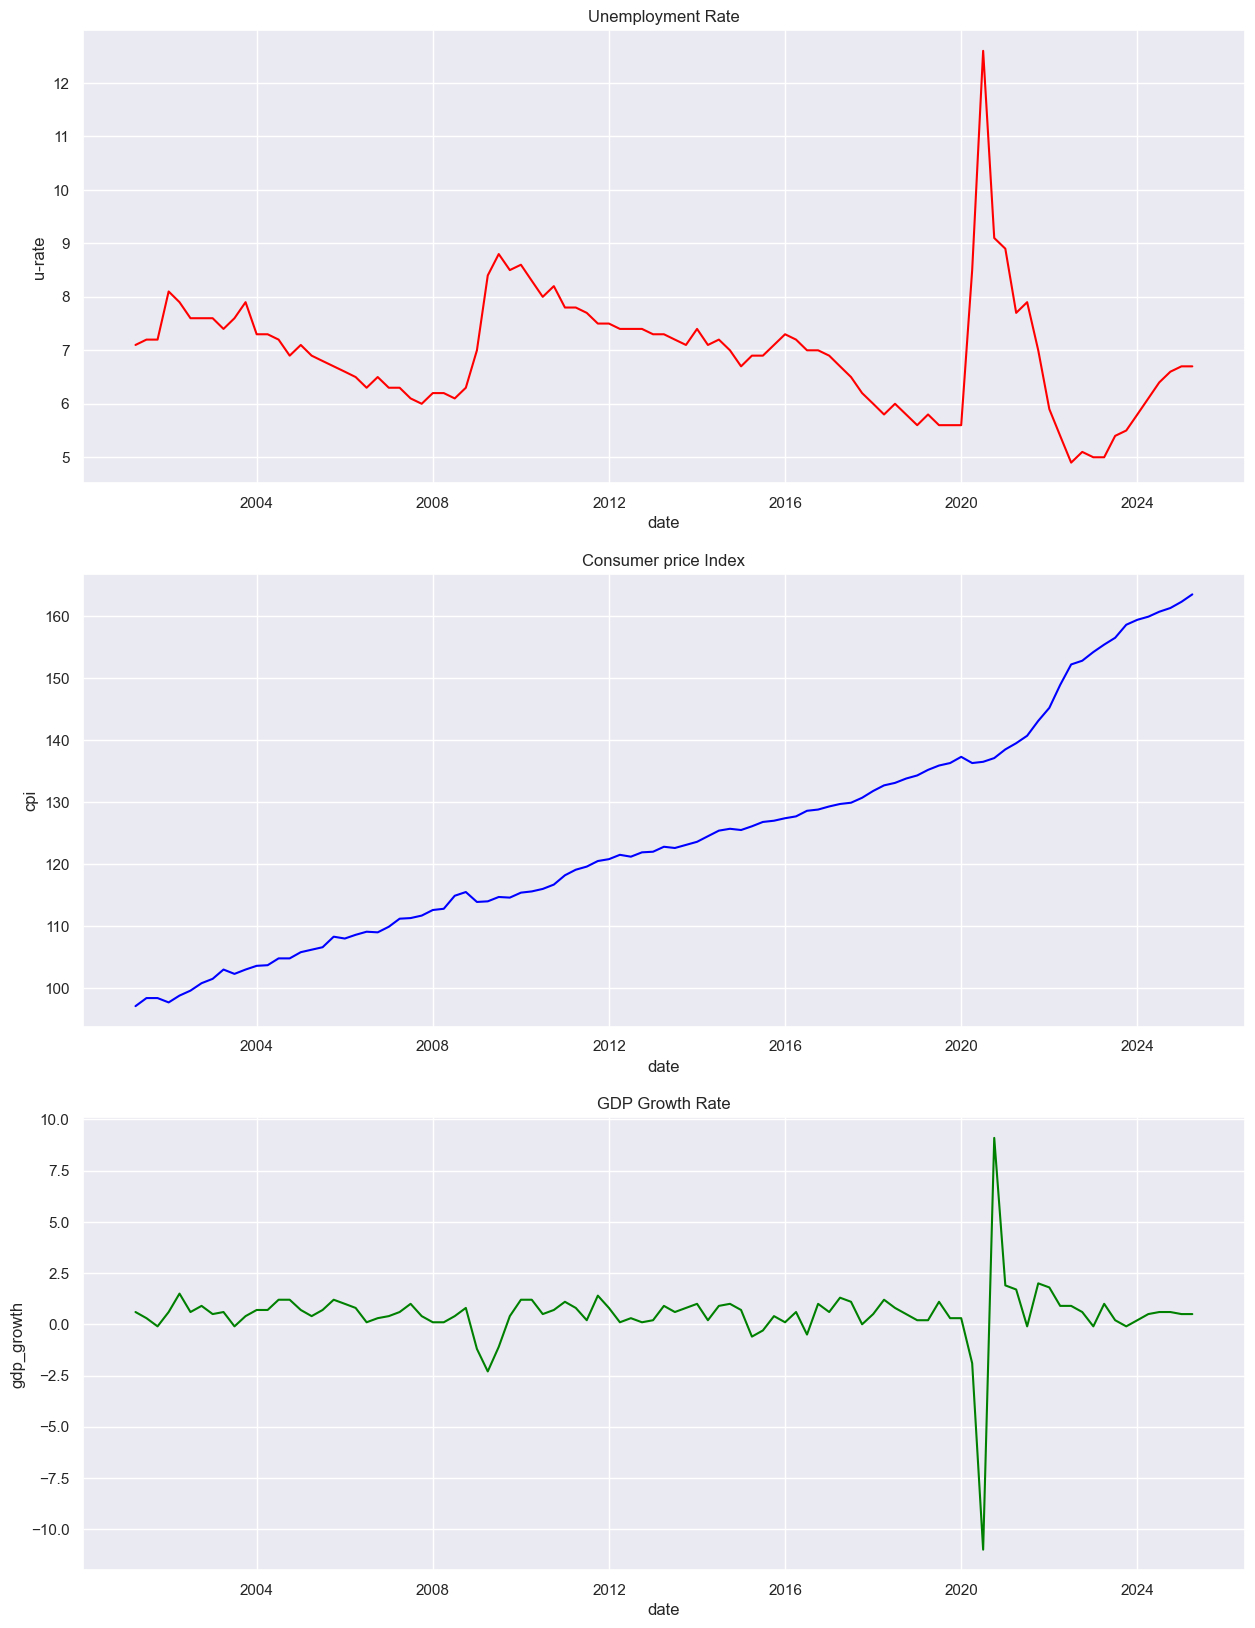

In [359]:
# Plotting the unemployment rate, CPI and GDP growth rate


fig, ax = plt.subplots(3, 1, figsize = (15,20))

#Seaborn plot on individual subplots
sns.lineplot(data = df_main, x = 'date', y = 'u-rate', ax = ax[0], color = 'red')
ax[0].set_title('Unemployment Rate')

sns.lineplot(data = df_main, x = 'date', y = 'cpi', ax = ax[1], color = 'blue')
ax[1].set_title('Consumer price Index')

sns.lineplot(data = df_main, x = 'date', y = 'gdp_growth', ax = ax[2], color = 'green')
ax[2].set_title('GDP Growth Rate')

#plt.tight_layout
plt.show()

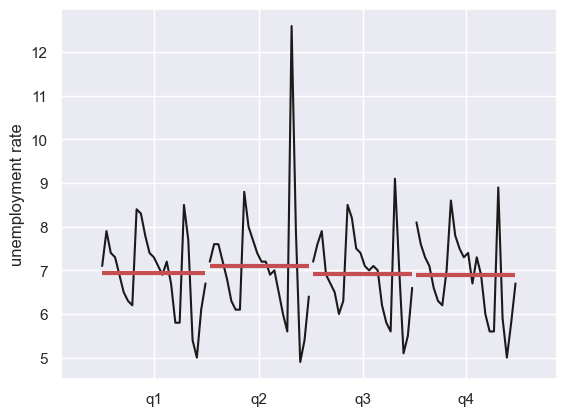

In [360]:
# Plotting Quarterly Seasonality

quarter_plot(df_main['u-rate'], ylabel='unemployment rate')

plt.show()

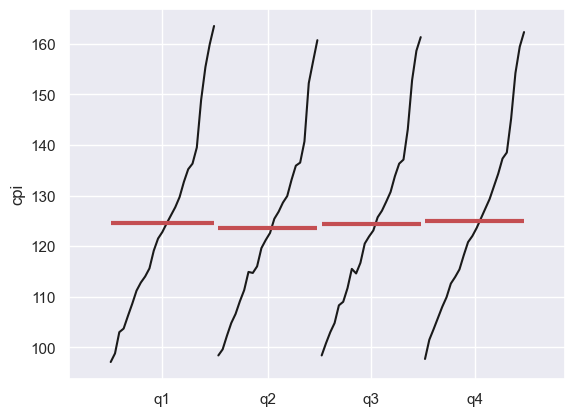

In [361]:
quarter_plot(df_main['cpi'], ylabel='cpi')

plt.show()

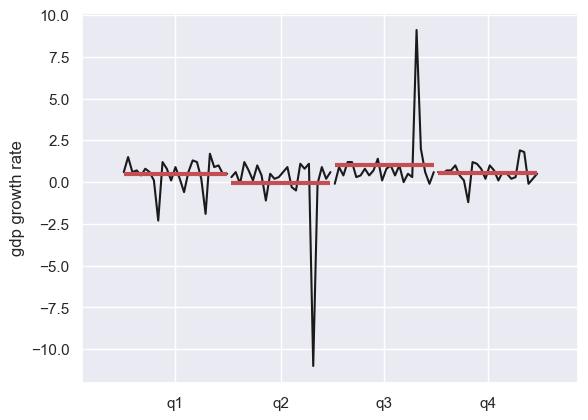

In [362]:
quarter_plot(df_main['gdp_growth'], ylabel='gdp growth rate')

plt.show()

In [363]:
# Seasonal Decomposition Plot 

def decomp (variable, trend):
    decomposition = seasonal_decompose(df_main[variable],
                                       model = trend,
                                       period = 4)
    fig = decomposition.plot()
    fig.set_size_inches(10,8)
    plt.show()


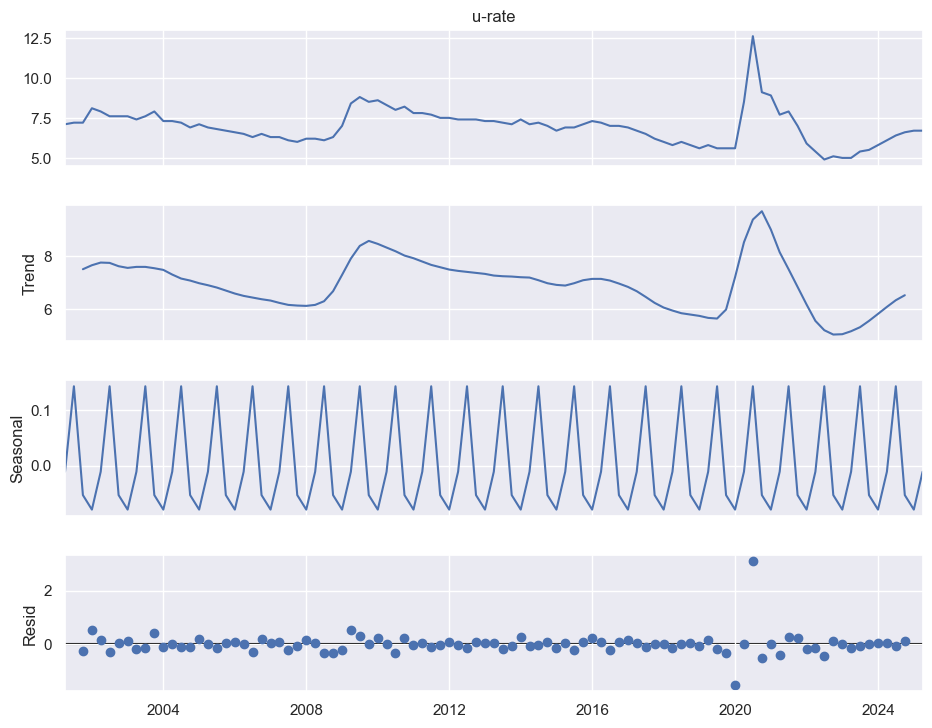

In [364]:
decomp('u-rate', 'additive')

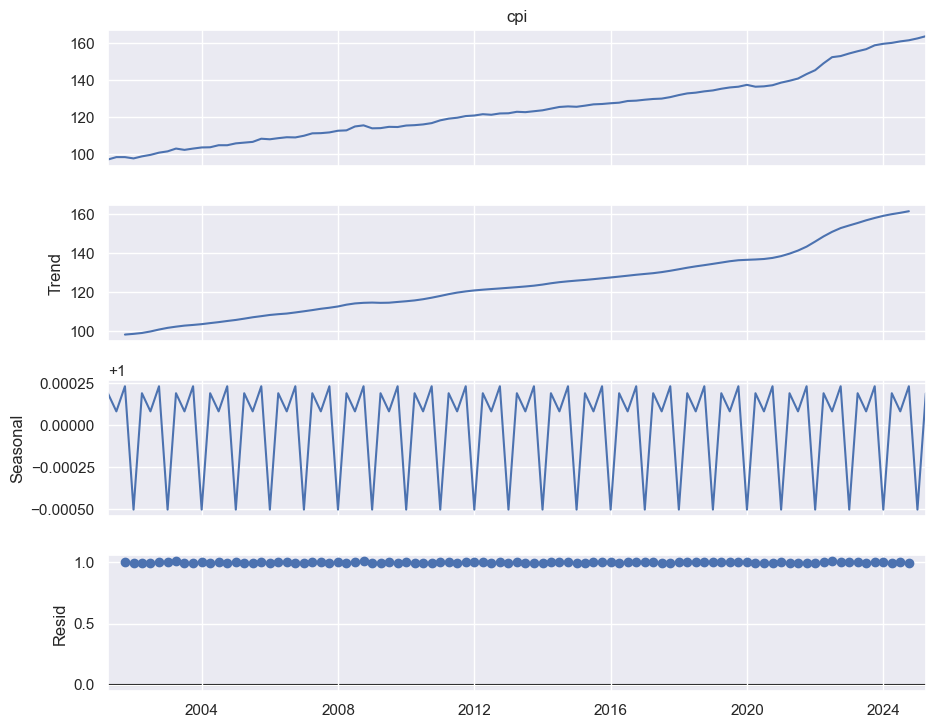

In [365]:
decomp('cpi', 'multiplicative')

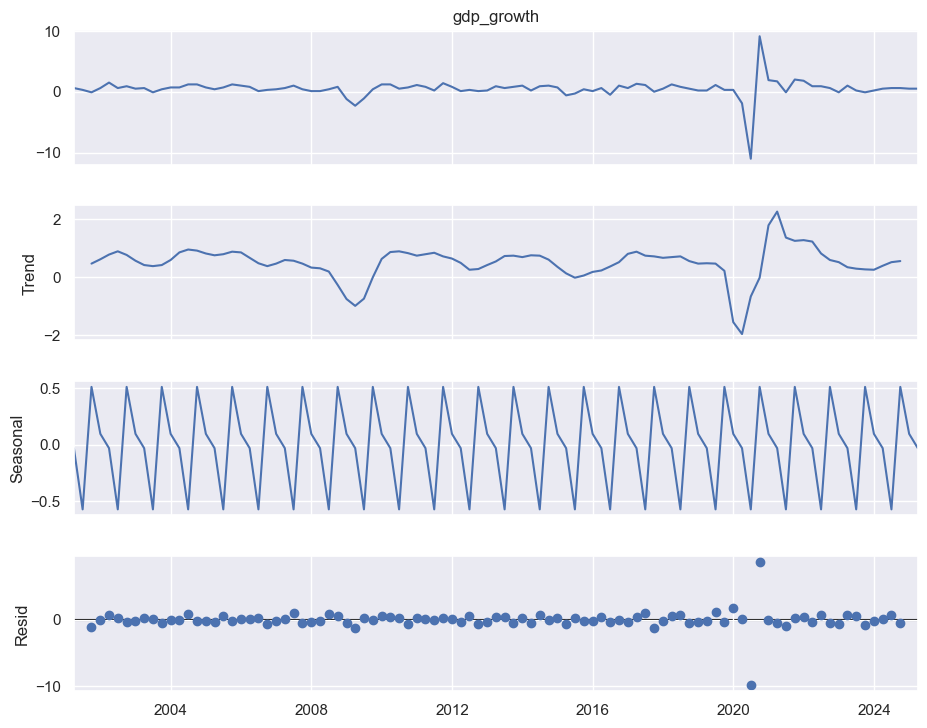

In [366]:
decomp('gdp_growth', 'additive')

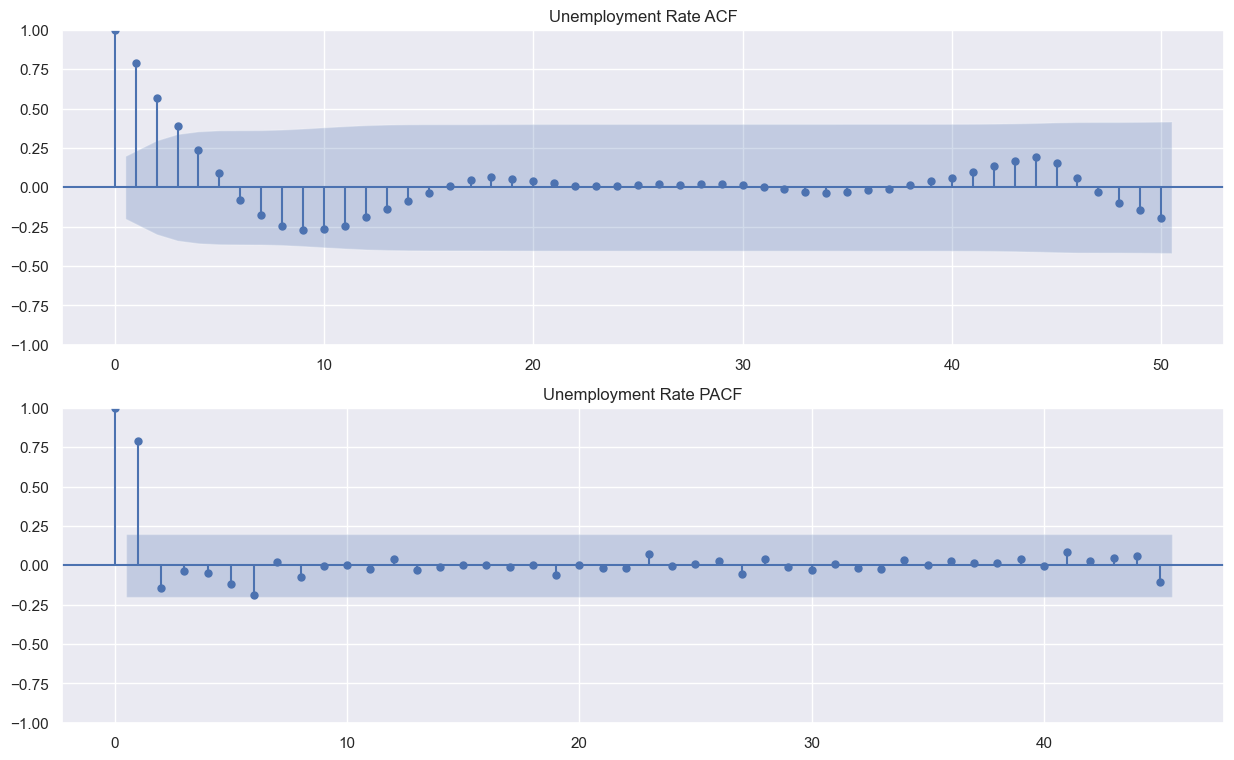

In [367]:
fig, ax = plt.subplots(2, 1, figsize = (15,9))
plot_acf(df_main['u-rate'], lags = 50, ax = ax[0])
ax[0].set_title('Unemployment Rate ACF')

plot_pacf(df_main['u-rate'], lags = 45, ax = ax[1])
ax[1].set_title('Unemployment Rate PACF')
plt.show()

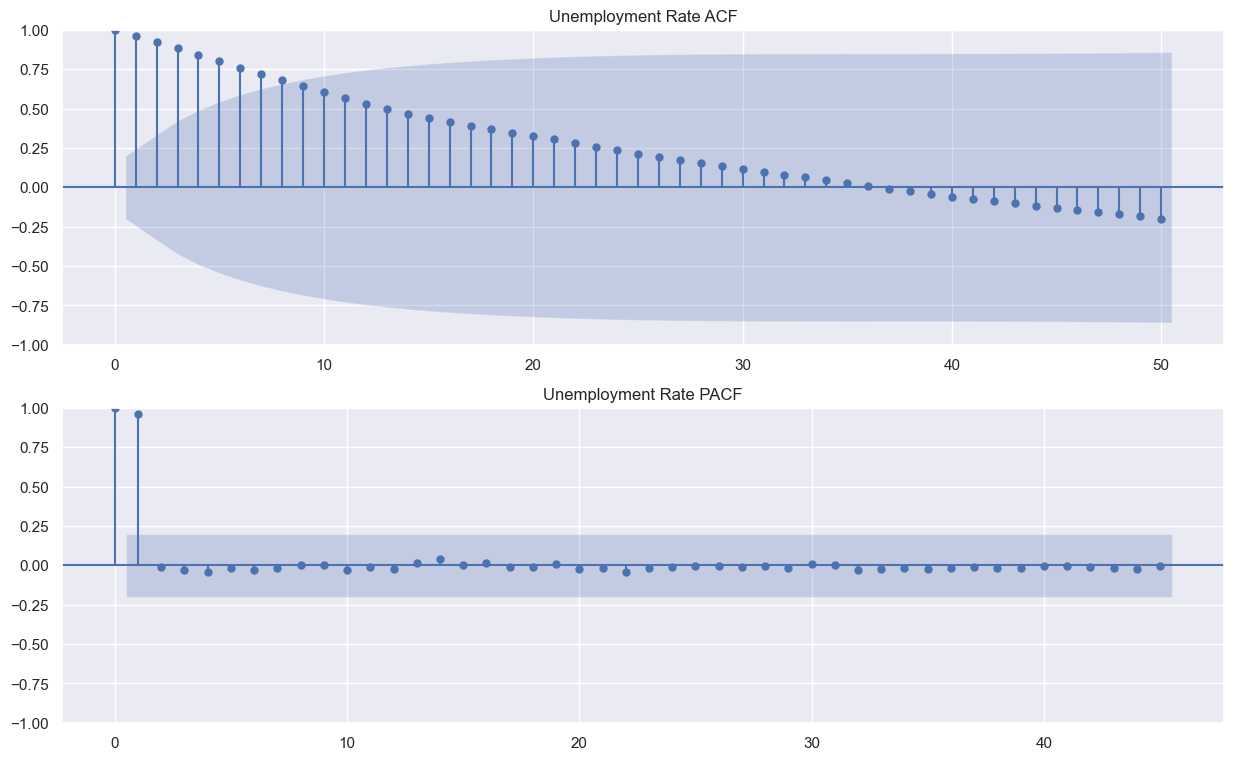

In [368]:
fig, ax = plt.subplots(2, 1, figsize = (15,9))
plot_acf(df_main['cpi'], lags = 50, ax = ax[0])
ax[0].set_title('Unemployment Rate ACF')

plot_pacf(df_main['cpi'], lags = 45, ax = ax[1])
ax[1].set_title('Unemployment Rate PACF')
plt.show()

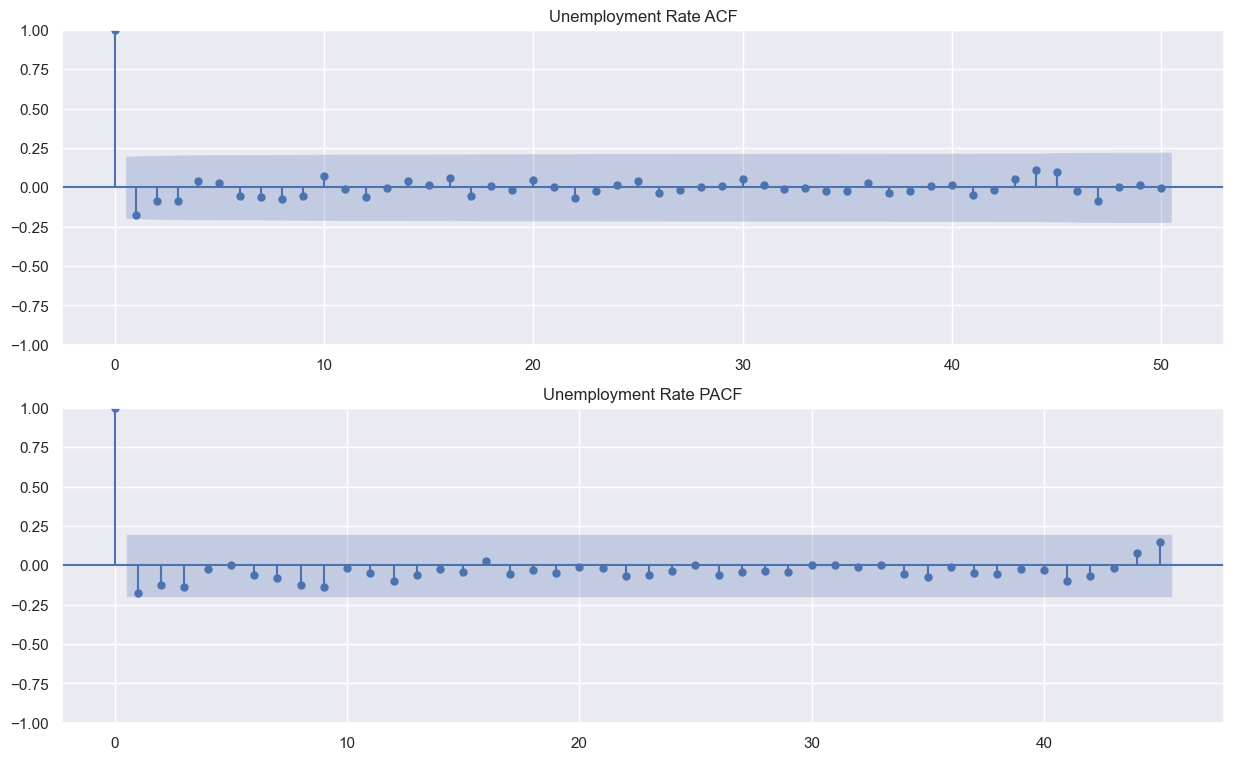

In [369]:
fig, ax = plt.subplots(2, 1, figsize = (15,9))
plot_acf(df_main['gdp_growth'], lags = 50, ax = ax[0])
ax[0].set_title('Unemployment Rate ACF')

plot_pacf(df_main['gdp_growth'], lags = 45, ax = ax[1])
ax[1].set_title('Unemployment Rate PACF')
plt.show()

### Splitting Trainin and Test Data

In [454]:
# Training and Test Split

train, test = df_main.iloc[:-20, :], df_main.iloc[-20:, :]


## Exponential Smoothing

In [373]:
def forecast_func1(train_pred, test_pred, periods, trend, seasonal):
    
    # train_pred is the training data you want to use for your forecast
    # train_pred is the test data you will use to test the model
    # period is the seasonal period for the Holt-Winter Model
    # trend goes into both double and triple smoothing functions. It should either be 'add' or 'mul'
    # seasonal goes into the triple smoothing function. It should either be 'add' or 'mul'



    ex_smooth = [] # ex_smooth stores a list of your forecast names using the different smoothing models
    model_names = ['Simple Exponential Smoothing', 'Double Exponential Smoothing', 'Holt-Winter Smoothing']
    df_perf = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'MAPE %'])  # df_perf stores your performance matrix
     
    # 1. Simple Exponential Smoothing
    model_simple = SimpleExpSmoothing(train_pred).fit()
    predictions_simple = model_simple.forecast(len(test_pred))
    ex_smooth.append(predictions_simple)
    
    # 2. Double Exponential Smoothing
    model_double = ExponentialSmoothing(train_pred, trend= trend, seasonal=None).fit()
    predictions_double = model_double.forecast(len(test_pred))
    ex_smooth.append(predictions_double)
    
    # 3. Holt-Winter (Triple Exponential) Smoothing
    model_triple = ExponentialSmoothing(train_pred, trend= trend, seasonal= seasonal, seasonal_periods= periods).fit()
    predictions_triple = model_triple.forecast(len(test_pred))
    ex_smooth.append(predictions_triple)
    
    # 4. Calculate error metrics for each model
    for i, preds in enumerate(ex_smooth):
        mae = mean_absolute_error(test_pred, preds)
        rmse = np.sqrt(mean_squared_error(test_pred, preds))
        mape = round(mean_absolute_percentage_error(test_pred, preds)* 100, 3)
        df_perf.loc[i] = [model_names[i], mae, rmse, mape]
    
    # 5. Plotting stacked predictions
    plt.figure(figsize=(15, 5))
    
    # Plot actual test values
    plt.plot(test_pred.index, test_pred, label='Actual', color='black', linewidth=2)
    
    # Plot predictions from each model
    colors = ['blue', 'green', 'red']
    for i, preds in enumerate(ex_smooth):
        plt.plot(test_pred.index, preds, label=model_names[i], color=colors[i], linestyle='--')
    
    plt.title('Forecast Comparison')
    plt.xlabel('Date/Index')
    plt.ylabel('Forecasted Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return df_perf

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


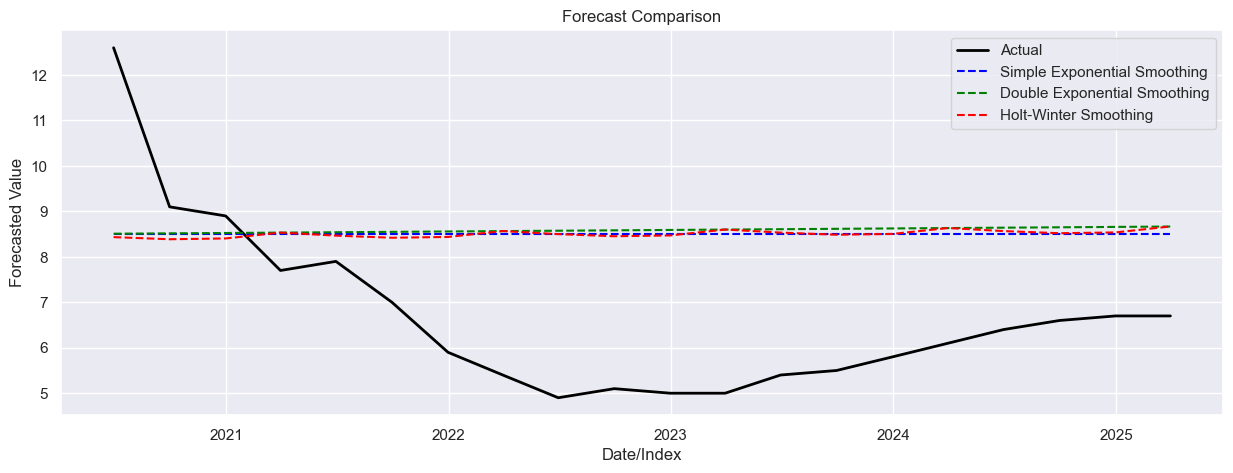

,Model,MAE,RMSE,MAPE %
0,Simple Exponential Smoothing,2.325000,2.570311,38.892
1,Double Exponential Smoothing,2.407354,2.651823,40.297
2,Holt-Winter Smoothing,2.358694,2.597381,39.364


In [374]:
forecast_func1(train['u-rate'], test['u-rate'], 4, 'mul', 'mul')

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


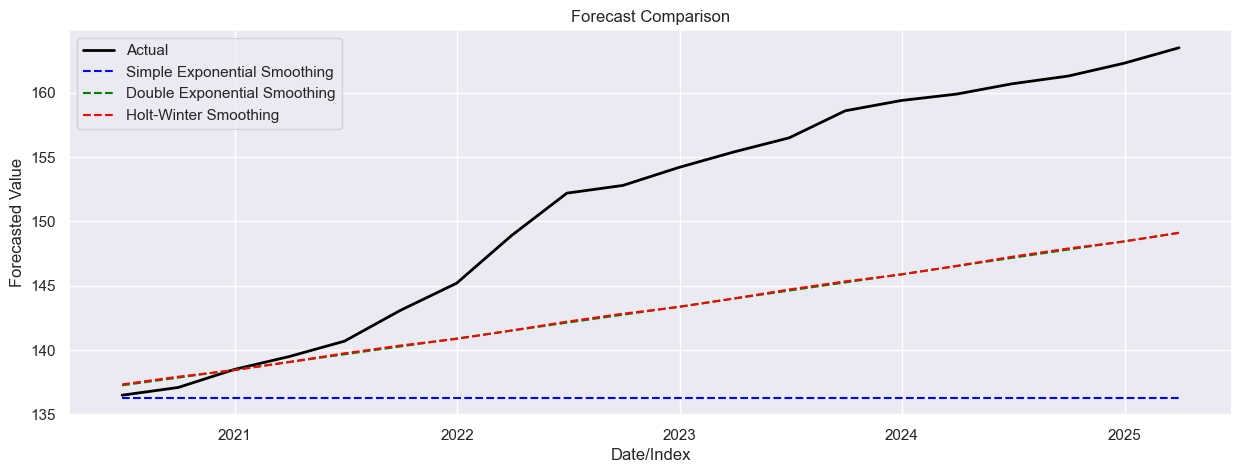

,Model,MAE,RMSE,MAPE %
0,Simple Exponential Smoothing,15.015000,17.552365,9.589
1,Double Exponential Smoothing,8.357620,9.938923,5.326
2,Holt-Winter Smoothing,8.336261,9.910464,5.313


In [375]:
forecast_func1(train['cpi'], test['cpi'], 4, 'mul', 'mul')

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


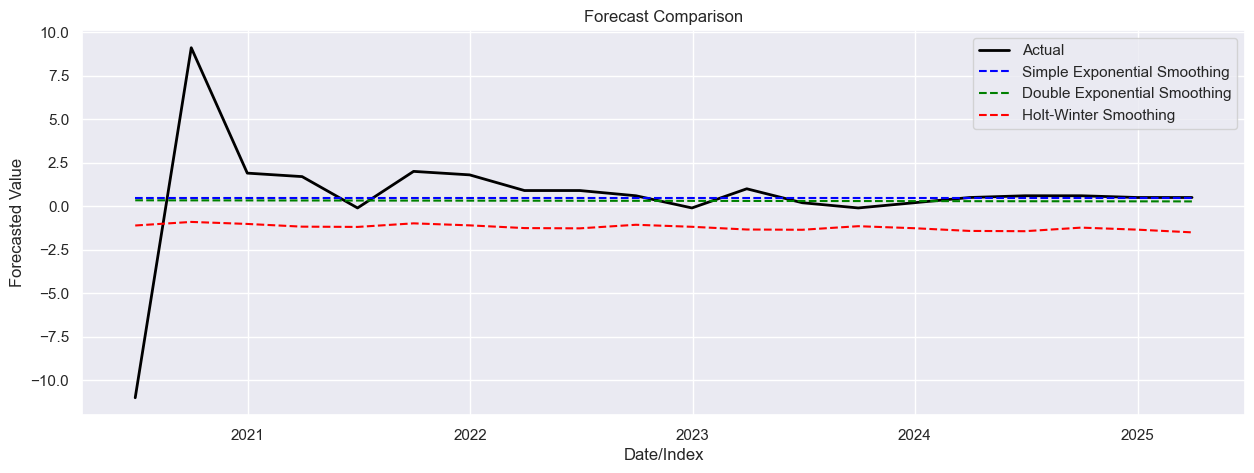

,Model,MAE,RMSE,MAPE %
0,Simple Exponential Smoothing,1.488221,3.282866,135.074
1,Double Exponential Smoothing,1.553314,3.292805,116.839
2,Holt-Winter Smoothing,2.788659,3.716255,417.564


In [376]:
forecast_func1(train['gdp_growth'], test['gdp_growth'], 4, 'add', 'add')

## Preparation for ARIMA

In [377]:
# Perform Augmented Dickey-Fuller test to check for stationarity

def dicfuller(value):
    result = adfuller(value)
    print('p-value: %f' %result[1])

    #Interpreting the results
    if result[1] < 0.05:
        print('Evidience suggests that then time series is stationary.')
    else:
        print('Evidence suggests that the time series is not stationary')


In [378]:
dicfuller(df_main['u-rate'])

p-value: 0.005852
Evidience suggests that then time series is stationary.


In [379]:
dicfuller(df_main['cpi'])

p-value: 1.000000
Evidence suggests that the time series is not stationary


In [380]:
dicfuller(df_main['gdp_growth'])

p-value: 0.000000
Evidience suggests that then time series is stationary.


In [381]:
# Making the CPI data stationary
# Difference the series

df_main['cpi_diff'] = df_main['cpi'].diff().dropna()

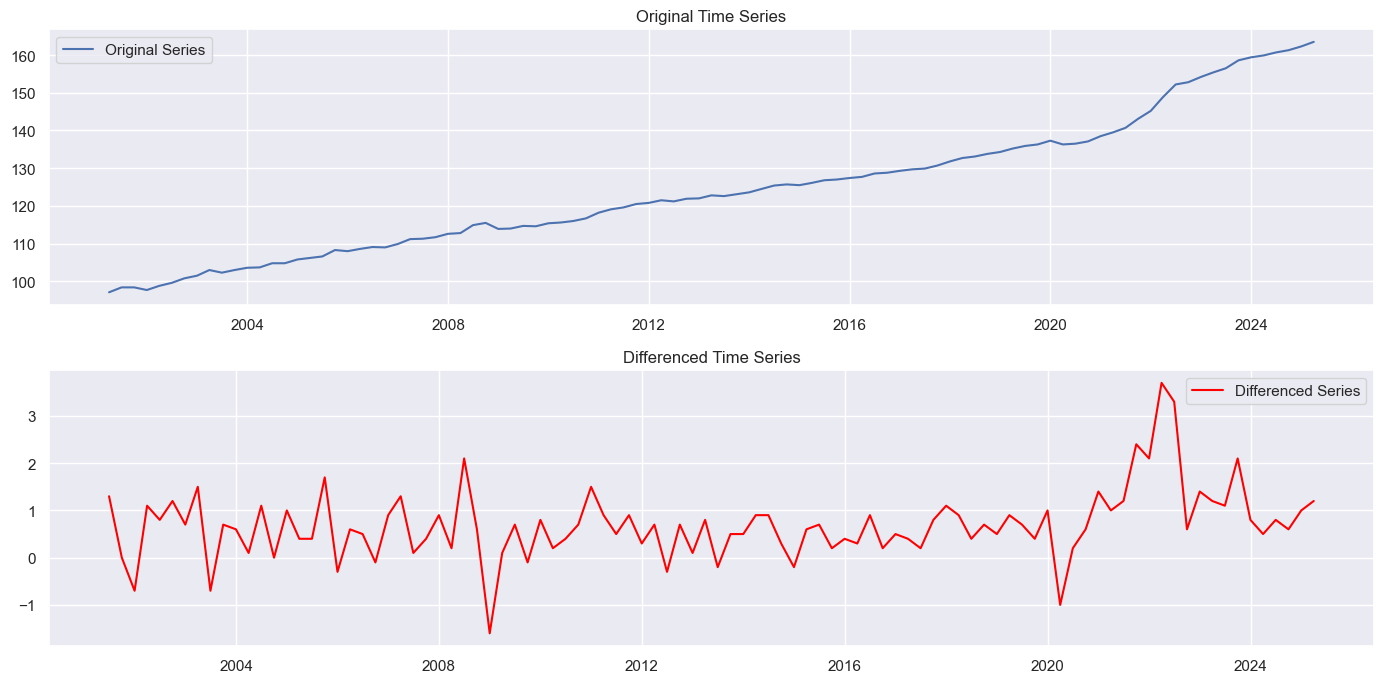

In [382]:
#Plotting the origial CPI and difference CPI
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1) # 2 rows, 1 column, 1st subplot
plt.plot(df_main['cpi'], label = 'Original Series')
plt.title('Original Time Series')
plt.legend()

plt.subplot(2,1,2) # 2 rows, 1 column, 2nd subplot
plt.plot(df_main['cpi_diff'], label = 'Differenced Series', color = 'red')
plt.title('Differenced Time Series')
plt.legend()

plt.tight_layout()
plt.show()

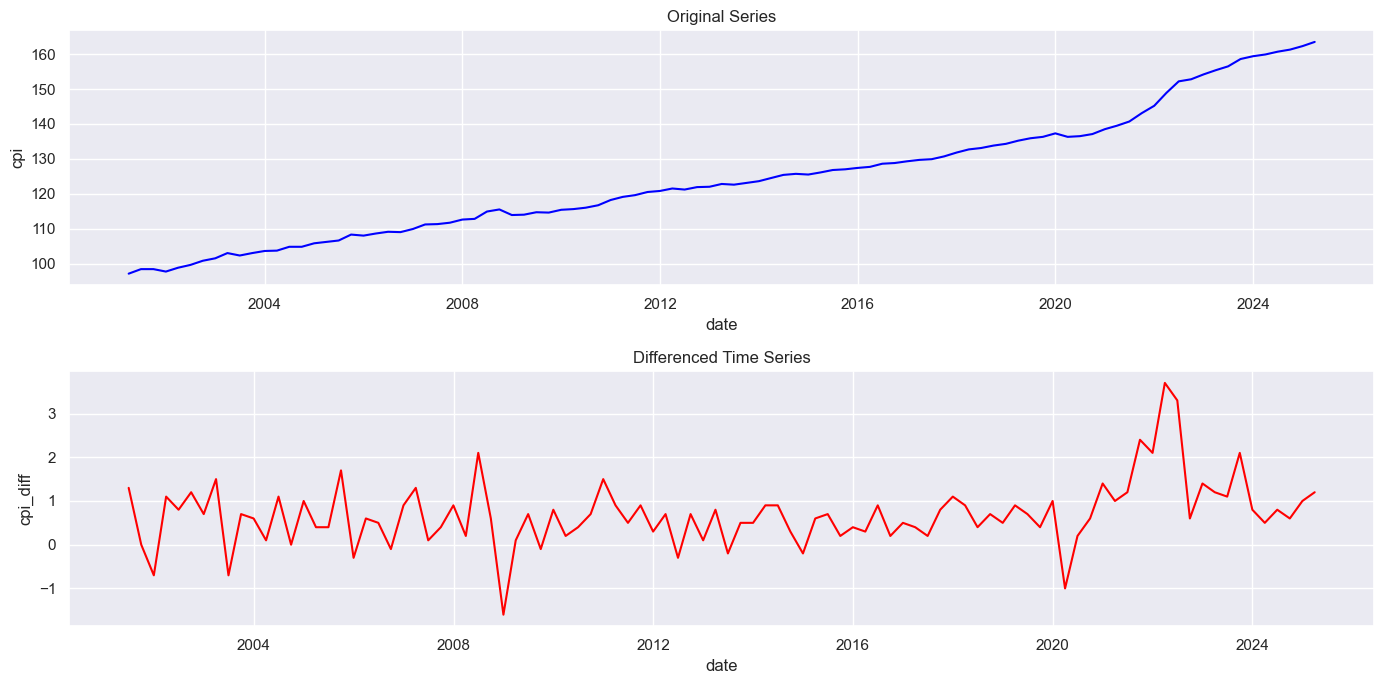

In [383]:
# Alternative Plot

fig, axs = plt.subplots(2, 1, figsize=(14, 7))

# Seaborn plots on specific axes
sns.lineplot(data = df_main, x = 'date', y = 'cpi', ax=axs[0], color = 'blue')
axs[0].set_title('Original Series')

sns.lineplot(data = df_main, x = 'date', y = 'cpi_diff', ax=axs[1], color = 'red')
axs[1].set_title('Differenced Time Series')

plt.tight_layout()
plt.show()


In [384]:
## Checking if cpi_diff is stationary

dicfuller(df_main['cpi_diff'].dropna())

p-value: 0.013866
Evidience suggests that then time series is stationary.


## ARIMA Model

In [385]:
model_urate = auto_arima(train['u-rate'], seasonal = False)

model_urate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   77
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 -38.999
Date:                Wed, 18 Jun 2025   AIC                             87.999
Time:                        02:41:49   BIC                             99.718
Sample:                    03-31-2001   HQIC                            92.686
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3233      0.194      1.662      0.096      -0.058       0.704
ar.L1          1.8944      0.067     28.391      0.000       1.764       2.025
ar.L2         -0.9397      0.062    -15.199      0.000      -1.061      -0.819
ma.L1         -0.9543      0.152     -6.278      0.000      -1.252      -0.656
sigma2         0.1527      0.024      6.440      0.000       0.106       0.199
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               940.44
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               4.40   Skew:                             3.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [386]:
# PRIDICTIONS

urate_predictions_arima = model_urate.predict(n_periods= len(test))

urate_predictions_arima

2020-06-30    8.882560
2020-09-30    9.162543
2020-12-31    9.333436
2021-03-31    9.394067
2021-06-30    9.348335
2021-09-30    9.204726
2021-12-31    8.975651
2022-03-31    8.676651
2022-06-30    8.325500
2022-09-30    7.941263
2022-12-31    7.543359
2023-03-31    7.150654
2023-06-30    6.780642
2023-09-30    6.448732
2023-12-31    6.167677
2024-03-31    5.947157
2024-06-30    5.793521
2024-09-30    5.709702
2024-12-31    5.695293
2025-03-31    5.746763
Freq: QE-DEC, dtype: float64

In [387]:
model_cpi = auto_arima(train['cpi'], seasonal = False)

model_cpi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   77
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 -63.966
Date:                Wed, 18 Jun 2025   AIC                            135.932
Time:                        02:41:57   BIC                            145.255
Sample:                    03-31-2001   HQIC                           139.658
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5215      0.037     13.921      0.000       0.448       0.595
ma.L1         -0.2498      0.132     -1.895      0.058      -0.508       0.009
ma.L2         -0.2378      0.111     -2.142      0.032      -0.455      -0.020
sigma2         0.3142      0.049      6.474      0.000       0.219       0.409
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.93
Prob(Q):                              0.93   Prob(JB):                         0.38
Heteroskedasticity (H):               0.54   Skew:                            -0.11
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [388]:
# PRIDICTIONS

cpi_predictions_arima = model_cpi.predict(n_periods= len(test))

cpi_predictions_arima

2020-06-30    137.025067
2020-09-30    137.870095
2020-12-31    138.391616
2021-03-31    138.913137
2021-06-30    139.434658
2021-09-30    139.956180
2021-12-31    140.477701
2022-03-31    140.999222
2022-06-30    141.520743
2022-09-30    142.042265
2022-12-31    142.563786
2023-03-31    143.085307
2023-06-30    143.606828
2023-09-30    144.128349
2023-12-31    144.649871
2024-03-31    145.171392
2024-06-30    145.692913
2024-09-30    146.214434
2024-12-31    146.735956
2025-03-31    147.257477
Freq: QE-DEC, dtype: float64

In [389]:
model_gdp = auto_arima(train['gdp_growth'], seasonal = False)

model_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   77
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -68.798
Date:                Wed, 18 Jun 2025   AIC                            145.595
Time:                        02:42:03   BIC                            154.971
Sample:                    03-31-2001   HQIC                           149.345
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3032      0.127      2.385      0.017       0.054       0.552
ar.L1          0.5368      0.100      5.363      0.000       0.341       0.733
ar.L2         -0.2040      0.162     -1.261      0.207      -0.521       0.113
sigma2         0.3482      0.043      8.075      0.000       0.264       0.433
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                60.13
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               3.42   Skew:                            -1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [390]:
# PRIDICTIONS

gdp_predictions_arima = model_gdp.predict(n_periods= len(test))

gdp_predictions_arima

2020-06-30   -0.777900
2020-09-30    0.273219
2020-12-31    0.608552
2021-03-31    0.574136
2021-06-30    0.487257
2021-09-30    0.447641
2021-12-31    0.444098
2022-03-31    0.450278
2022-06-30    0.454318
2022-09-30    0.455226
2022-12-31    0.454889
2023-03-31    0.454523
2023-06-30    0.454395
2023-09-30    0.454401
2023-12-31    0.454431
2024-03-31    0.454445
2024-06-30    0.454447
2024-09-30    0.454445
2024-12-31    0.454443
2025-03-31    0.454443
Freq: QE-DEC, dtype: float64

In [391]:
# Model Assessment 

# Function to Assess Model and Visualize Output

def model_assessment(train, test, predictions, chart_title):
    plt.figure(figsize= (15,4))
    plt.plot(train, label = 'Train')
    plt.plot(test, label = 'Test', color = 'green')
    plt.plot(predictions, label = 'Forecast', color = 'red')
    plt.title(f'Train, Test and Predictions with {chart_title}')
    plt.legend()
    plt.show()

    # Calculating the MAE, RMSE, MAPE
    mae = mean_absolute_error(test, predictions)
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mape = mean_absolute_percentage_error(test, predictions)

    print(f'The MAE is {mae: .2f}')
    print(f'The RMSE is {rmse: .2f}')
    print(f'The MAPE is {mape * 100: .2f}%')

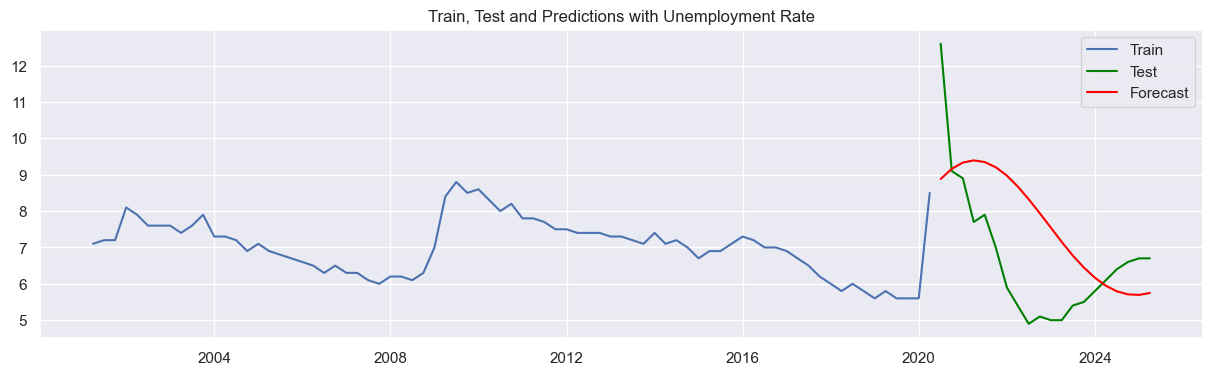

The MAE is  1.66
The RMSE is  2.01
The MAPE is  27.15%


In [392]:
model_assessment(train['u-rate'], test['u-rate'], urate_predictions_arima, 'Unemployment Rate')

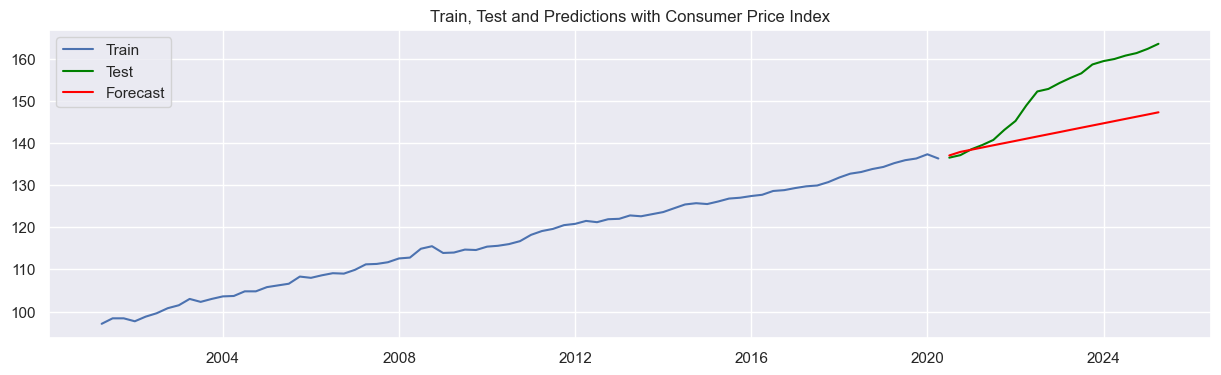

The MAE is  9.16
The RMSE is  10.92
The MAPE is  5.83%


In [393]:
model_assessment(train['cpi'], test['cpi'], cpi_predictions_arima, 'Consumer Price Index')

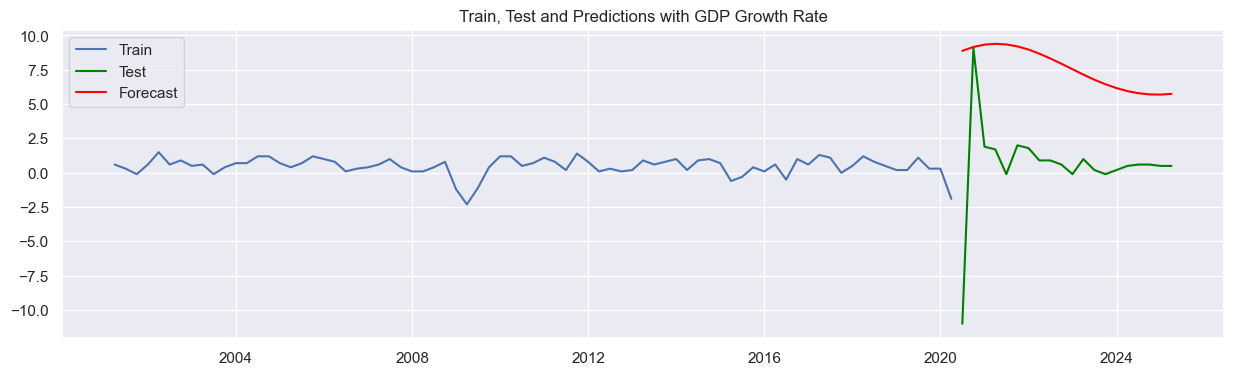

The MAE is  7.03
The RMSE is  7.83
The MAPE is  2006.08%


In [394]:
model_assessment(train['gdp_growth'], test['gdp_growth'], urate_predictions_arima, 'GDP Growth Rate')

## Vector Autoregression Model

In [395]:
# Importing Statmodels for VAR

from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import grangercausalitytests

from statsmodels.tsa.vector_ar.vecm import coint_johansen


In [410]:
df_main

,u-rate,cpi,gdp_growth,cpi_diff
date,,,,
2001-03-31,7.1,97.1,0.6,NaN
2001-06-30,7.2,98.4,0.3,1.3
2001-09-30,7.2,98.4,-0.1,0.0
2001-12-31,8.1,97.7,0.6,-0.7
2002-03-31,7.9,98.8,1.5,1.1
...,...,...,...,...
2024-03-31,6.1,159.9,0.5,0.5
2024-06-30,6.4,160.7,0.6,0.8
2024-09-30,6.6,161.3,0.6,0.6


In [411]:
df_main.drop('cpi_diff', axis = 1, inplace=True)

### Testing for Causality

In [412]:
## Granger Causality Test

maxlag = 12

test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test= 'ssr_chi2test', verbose= False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


In [413]:
grangers_causation_matrix(df_main, variables = df_main.columns)

,u-rate_x,cpi_x,gdp_growth_x
u-rate_y,1.0,0.0006,0.0
cpi_y,0.0,1.0000,0.0
gdp_growth_y,0.0,0.0010,1.0


#### Observation

All the p-values are less than 0.05, hence there is causality amongst all three variables. 

All variables in the system are interchangeably causing each other. 

#### Selecting the Order of the VAR model

In [414]:
df_main1 = df_main.copy()

In [415]:
# Making the CPI data stationary
# Difference the series

df_main1['cpi_diff'] = df_main['cpi'].diff().dropna()

In [419]:
df_main2 = df_main1[['u-rate', 'cpi_diff', 'gdp_growth']]

In [ ]:
df_main2 = df_main2.drop(df_main2.index[0]) ## to drop the first row becuase it has a null value

In [424]:
model = VAR(df_main2)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -2.1263616567428327
BIC :  -1.8037666809617117
FPE :  0.11928827875926976
HQIC:  -1.9960090838795845 

Lag Order = 2
AIC :  -2.3804848545780124
BIC :  -1.812301977687905
FPE :  0.092582404585897
HQIC:  -2.150980558662619 

Lag Order = 3
AIC :  -2.4449973378496477
BIC :  -1.628029759413114
FPE :  0.086943787758225
HQIC:  -2.1151291994882486 

Lag Order = 4
AIC :  -2.4914923444031247
BIC :  -1.422473273697553
FPE :  0.08326050779822446
HQIC:  -2.060027189620671 

Lag Order = 5
AIC :  -2.3451588082921297
BIC :  -1.0207493982612643
FPE :  0.09689942437937404
HQIC:  -1.8108420997573749 

Lag Order = 6
AIC :  -2.217401066838871
BIC :  -0.634188275629703
FPE :  0.11101791237490936
HQIC:  -1.5789566063326712 

Lag Order = 7
AIC :  -2.0729892559538903
BIC :  -0.22748363345589917
FPE :  0.12981790027861062
HQIC:  -1.3291189005034751 

Lag Order = 8
AIC :  -2.202318269063897
BIC :  -0.09095166581542502
FPE :  0.11600703459583708
HQIC:  -1.3517016634771455 

Lag Order = 9
AIC 

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


#### Observation

Using AIC, choose 4 lags

In [425]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,0.6006,0.6874,1.823,0.6355
1,-2.053,-1.706,0.1283,-1.914
2,-2.412,-1.804*,0.08978,-2.167*
3,-2.440*,-1.572,0.08742*,-2.091
4,-2.383,-1.255,0.09295,-1.930
5,-2.299,-0.9101,0.1018,-1.741
6,-2.178,-0.5288,0.1160,-1.515
7,-2.129,-0.2188,0.1235,-1.361
8,-2.245,-0.07454,0.1120,-1.372
9,-2.293,0.1379,0.1093,-1.316


### Train and Test for the Var Model

In [426]:
# Training and Test Split

train_2, test_2 = df_main2.iloc[:-20, :], df_main2.iloc[-20:, :]

### Testing the Var Model of Selected Order(p)

In [429]:
model_train = VAR(train_2)

/opt/anaconda3/envs/python_course/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [430]:
model_train_fitted = model_train.fit(4)
model_train_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, Jun, 2025
Time:                     02:52:01
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.34743
Nobs:                     72.0000    HQIC:                  -4.08969
Log likelihood:          -102.588    FPE:                  0.0103723
AIC:                     -4.58063    Det(Omega_mle):      0.00630399
--------------------------------------------------------------------
Results for equation u-rate
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 1.057307         0.572169            1.848           0.065
L1.u-rate             0.783935         0.275384            2.847           0.004
L1.cpi_diff          -0.005292         0.106728           -

### Checking for Serial Correlation of Residuals using Durbin Watson Statistic

In [431]:
# Importing library for Durbin Watson test
from statsmodels.stats.stattools import durbin_watson

In [432]:
out = durbin_watson(model_train_fitted.resid)

for col, val in zip(train_2.columns, out):
    print(col, ':', round(val, 2))

u-rate : 1.43
cpi_diff : 2.04
gdp_growth : 1.9


In [433]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, Jun, 2025
Time:                     02:53:06
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.42247
Nobs:                     92.0000    HQIC:                  -2.06003
Log likelihood:          -238.018    FPE:                  0.0832605
AIC:                     -2.49149    Det(Omega_mle):       0.0560060
--------------------------------------------------------------------
Results for equation u-rate
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 1.982067         0.589208            3.364           0.001
L1.u-rate             1.708506         0.212210            8.051           0.000
L1.cpi_diff          -0.226608         0.095775           -

In [434]:
out = durbin_watson(model_fitted.resid)

for col, val in zip(df_main2.columns, out):
    print(col, ':', round(val, 2))

u-rate : 2.0
cpi_diff : 2.02
gdp_growth : 1.98


#### Observation

No Serial Correlation among the error terms

### Testing the Model

In [435]:
# Get the lag order from the fitted model
lag_order = model_train_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_train_input = train_2.values[-lag_order:]
forecast_train_input

4


array([[ 5.6,  0.7,  1.1],
       [ 5.6,  0.4,  0.3],
       [ 5.6,  1. ,  0.3],
       [ 8.5, -1. , -1.9]])

In [436]:
# Forecast

nobs = len(test_2)
fc = model_fitted.forecast(y=forecast_train_input, steps=nobs)
train_2_forecast = pd.DataFrame(fc, index=test_2.index, columns=train_2.columns + '_1d')
train_2_forecast

,u-rate_1d,cpi_diff_1d,gdp_growth_1d
date,,,
2020-06-30,10.426307,-0.401875,-5.282275
2020-09-30,8.828516,0.310971,4.516340
2020-12-31,8.861197,0.853397,1.204592
2021-03-31,8.352767,0.404088,0.783363
2021-06-30,8.215631,0.635854,0.748920
2021-09-30,7.719500,1.399510,1.110139
2021-12-31,7.029554,0.919758,1.652614
2022-03-31,6.781729,1.093910,0.921592
2022-06-30,6.595069,1.059257,0.627027


In [437]:
train_2

,u-rate,cpi_diff,gdp_growth
date,,,
2001-06-30,7.2,1.3,0.3
2001-09-30,7.2,0.0,-0.1
2001-12-31,8.1,-0.7,0.6
2002-03-31,7.9,1.1,1.5
2002-06-30,7.6,0.8,0.6
...,...,...,...
2019-03-31,5.8,0.9,0.2
2019-06-30,5.6,0.7,1.1
2019-09-30,5.6,0.4,0.3


In [438]:
train

,u-rate,cpi,gdp_growth
date,,,
2001-03-31,7.1,97.1,0.6
2001-06-30,7.2,98.4,0.3
2001-09-30,7.2,98.4,-0.1
2001-12-31,8.1,97.7,0.6
2002-03-31,7.9,98.8,1.5
...,...,...,...
2019-03-31,5.8,135.2,0.2
2019-06-30,5.6,135.9,1.1
2019-09-30,5.6,136.3,0.3


In [440]:
last_cpi = train['cpi'].iloc[-1]

In [442]:
# Suppose your forecasted differences are in train_2_forecast['cpi_diff_1d']
dediff_cpi = last_cpi + train_2_forecast['cpi_diff_1d'].cumsum()

In [475]:
dediff_cpi

date
2020-06-30    135.898125
2020-09-30    136.209096
2020-12-31    137.062493
2021-03-31    137.466581
2021-06-30    138.102436
2021-09-30    139.501946
2021-12-31    140.421704
2022-03-31    141.515614
2022-06-30    142.574871
2022-09-30    143.476813
2022-12-31    144.439785
2023-03-31    145.246669
2023-06-30    145.972901
2023-09-30    146.685932
2023-12-31    147.344362
2024-03-31    147.979198
2024-06-30    148.613145
2024-09-30    149.239242
2024-12-31    149.879063
2025-03-31    150.535993
Name: cpi_diff_1d, dtype: float64

In [476]:
train_2_forecast_new = pd.merge(train_2_forecast, dediff_cpi, on = 'date', how = 'inner')

In [477]:
train_2_forecast_new.drop(['cpi_diff_1d_x'], axis=1, inplace= True)

In [478]:
train_2_forecast_new.rename(columns={'u-rate_1d': 'u-rate_forcast', 'gdp_growth_1d': 'gdp_growth_forecast', 'cpi_diff_1d_y': 'cpi_forecast'}, inplace= True)

In [479]:
train_2_forecast_new

,u-rate_forcast,gdp_growth_forecast,cpi_forecast
date,,,
2020-06-30,10.426307,-5.282275,135.898125
2020-09-30,8.828516,4.516340,136.209096
2020-12-31,8.861197,1.204592,137.062493
2021-03-31,8.352767,0.783363,137.466581
2021-06-30,8.215631,0.748920,138.102436
2021-09-30,7.719500,1.110139,139.501946
2021-12-31,7.029554,1.652614,140.421704
2022-03-31,6.781729,0.921592,141.515614
2022-06-30,6.595069,0.627027,142.574871


In [456]:
test

,u-rate,cpi,gdp_growth
date,,,
2020-06-30,12.6,136.5,-11.0
2020-09-30,9.1,137.1,9.1
2020-12-31,8.9,138.5,1.9
2021-03-31,7.7,139.5,1.7
2021-06-30,7.9,140.7,-0.1
2021-09-30,7.0,143.1,2.0
2021-12-31,5.9,145.2,1.8
2022-03-31,5.4,148.9,0.9
2022-06-30,4.9,152.2,0.9


### Plotting the Forecast Values with the Test data

In [464]:
def model_graph(forecast, test, chart_title):
    plt.figure(figsize= (15,4))
    plt.plot(test, label = 'Test', color = 'green')
    plt.plot(forecast, label = 'Forecast', color = 'red')
    plt.title(f'Test and Predictions with {chart_title}')
    plt.legend()
    plt.show()

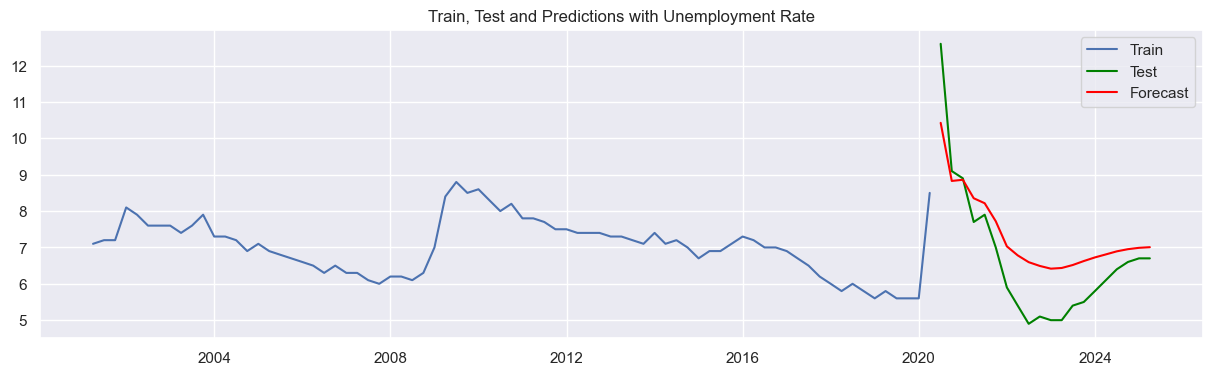

In [470]:
model_assessment(train['u-rate'], test['u-rate'], train_2_forecast_new['u-rate_forcast'], 'Unemployment Rate')

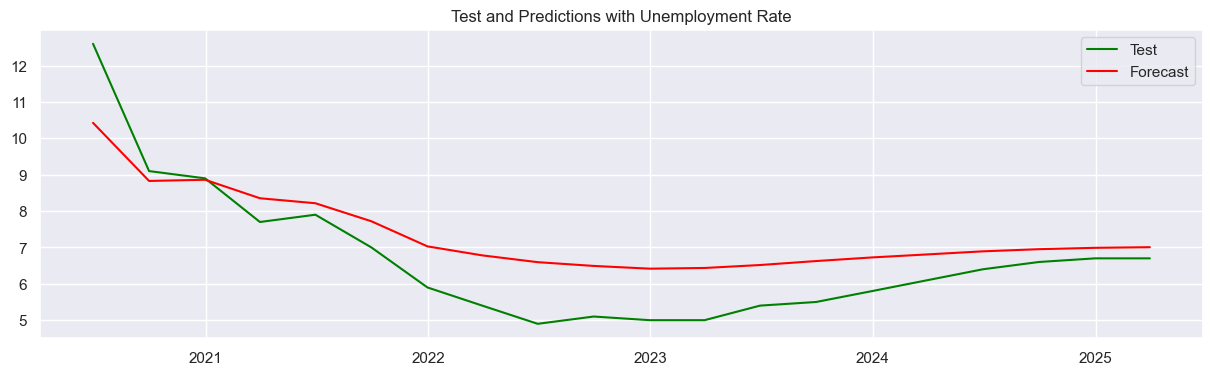

In [466]:
model_graph(train_2_forecast_new['u-rate_forcast'], test['u-rate'], 'Unemployment Rate')

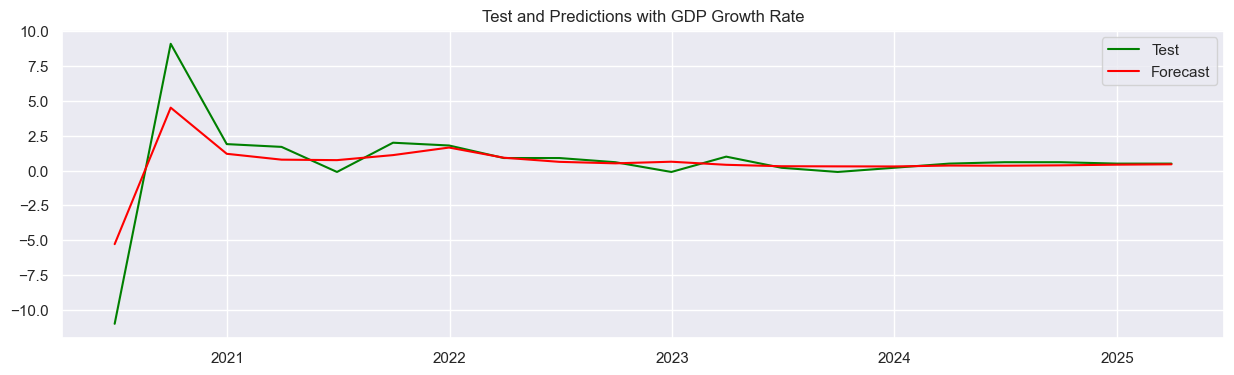

In [467]:
model_graph(train_2_forecast_new['gdp_growth_forecast'], test['gdp_growth'], 'GDP Growth Rate')

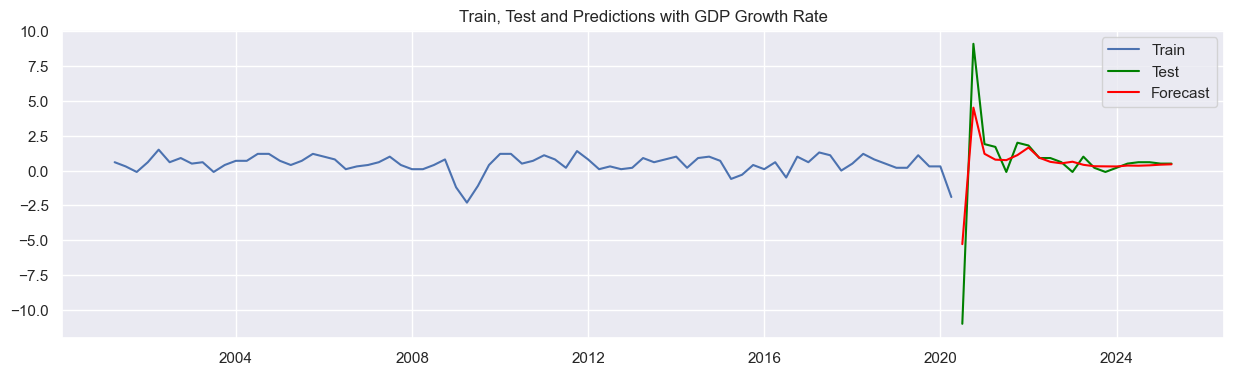

In [471]:
model_assessment(train['gdp_growth'], test['gdp_growth'], train_2_forecast_new['gdp_growth_forecast'], 'GDP Growth Rate')

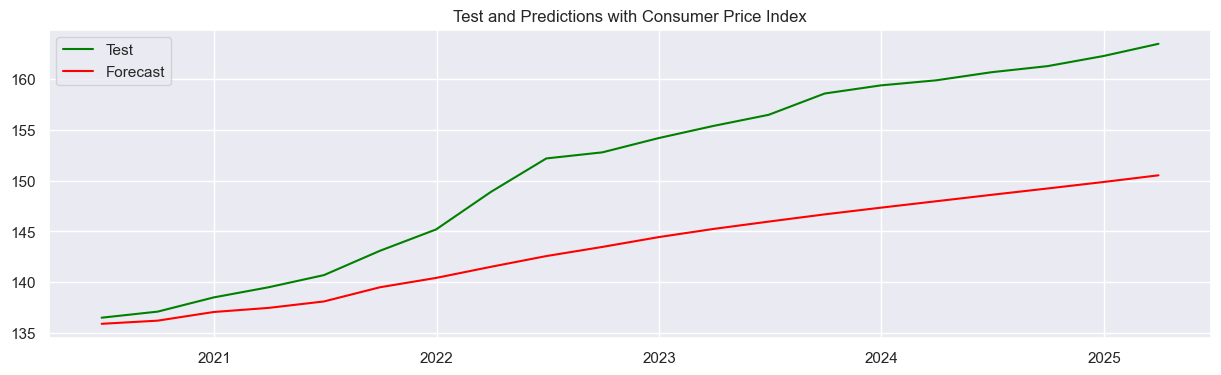

In [480]:
model_graph(train_2_forecast_new['cpi_forecast'], test['cpi'], 'Consumer Price Index')

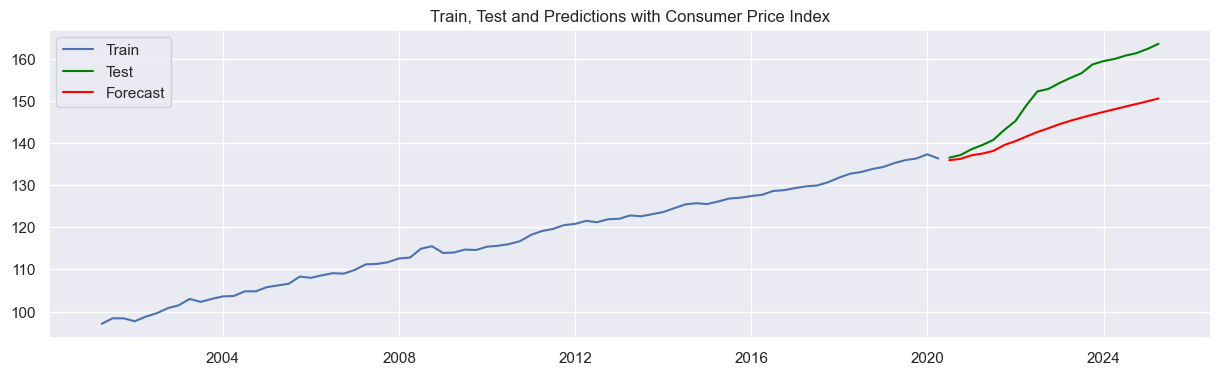

In [482]:
model_assessment(train['cpi'], test['cpi'], train_2_forecast_new['cpi_forecast'], 'Consumer Price Index')

In [281]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+ '_1d'].cumsum()
    return df_fc

In [282]:
train_result = invert_transformation(train_2, train_2_forecast, second_diff= False)

In [ ]:


train_result.drop(['u-rate_forecast', 'cpi_diff_1d', 'gdp_growth_forecast'], axis= 1, inplace=True) 

In [275]:
train

,u-rate,cpi,gdp_growth
date,,,
2001-03-31,7.1,97.1,0.6
2001-06-30,7.2,98.4,0.3
2001-09-30,7.2,98.4,-0.1
2001-12-31,8.1,97.7,0.6
2002-03-31,7.9,98.8,1.5
...,...,...,...
2019-03-31,5.8,135.2,0.2
2019-06-30,5.6,135.9,1.1
2019-09-30,5.6,136.3,0.3


In [283]:
train_result

,u-rate_1d,cpi_diff_1d,gdp_growth_1d,u-rate_forecast,cpi_diff_forecast,gdp_growth_forecast
date,,,,,,
2020-06-30,10.426307,-0.401875,-5.282275,18.926307,-1.401875,-7.182275
2020-09-30,8.828516,0.310971,4.516340,27.754823,-1.090904,-2.665935
2020-12-31,8.861197,0.853397,1.204592,36.616019,-0.237507,-1.461343
2021-03-31,8.352767,0.404088,0.783363,44.968786,0.166581,-0.677980
2021-06-30,8.215631,0.635854,0.748920,53.184417,0.802436,0.070940
2021-09-30,7.719500,1.399510,1.110139,60.903917,2.201946,1.181078
2021-12-31,7.029554,0.919758,1.652614,67.933471,3.121704,2.833692
2022-03-31,6.781729,1.093910,0.921592,74.715200,4.215614,3.755284
2022-06-30,6.595069,1.059257,0.627027,81.310269,5.274871,4.382311


In [256]:
train_result.rename(columns={'u-rate_1d': 'u-rate_forcast', 'gdp_growth_1d': 'gdp_growth_forecast'}, inplace= True)

In [257]:
train_result

,u-rate_forcast,gdp_growth_forecast,cpi_diff_forecast
date,,,
2020-06-30,10.426307,-5.282275,-1.401875
2020-09-30,8.828516,4.516340,-1.090904
2020-12-31,8.861197,1.204592,-0.237507
2021-03-31,8.352767,0.783363,0.166581
2021-06-30,8.215631,0.748920,0.802436
2021-09-30,7.719500,1.110139,2.201946
2021-12-31,7.029554,1.652614,3.121704
2022-03-31,6.781729,0.921592,4.215614
2022-06-30,6.595069,0.627027,5.274871


### Forecasting the VAR Model

In [223]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_main2.values[-lag_order:]
forecast_input

4


array([[6.4, 0.8, 0.6],
       [6.6, 0.6, 0.6],
       [6.7, 1. , 0.5],
       [6.7, 1.2, 0.5]])

In [226]:
# Forecast

nobs = len(test_2)
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_main2_forecast = pd.DataFrame(fc, index=test_2.index, columns=df_main2.columns + '_2d')
df_main2_forecast

,u-rate_2d,cpi_diff_2d,gdp_growth_2d
date,,,
2020-06-30,6.699832,0.878942,0.602257
2020-09-30,6.754692,0.903899,0.425322
2020-12-31,6.729078,0.860713,0.530926
2021-03-31,6.748497,0.790600,0.447391
2021-06-30,6.764939,0.787657,0.463605
2021-09-30,6.793855,0.733857,0.422166
2021-12-31,6.819799,0.721550,0.431254
2022-03-31,6.846739,0.709104,0.438262
2022-06-30,6.874220,0.692732,0.424096
